<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Grouping Data with Pandas - Lab Solution

---

You are going to investigate UFO sightings around the US.  This lab will give you practice performing `groupby` operations to split data along multiple dimensions and investigate patterns between subsets of the data using basic aggregation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### 1. Load and print the header for the UFO data.

In [2]:
ufo_csv = '../../../../../resource-datasets/ufo_sightings/ufo.csv'

In [3]:
# A:
df = pd.read_csv(ufo_csv)

In [4]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 2. How many null values exist per column?

In [5]:
# A:
df.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

In [6]:
df.shape

(80543, 5)

#### 3. Which city has the most observations?

In [7]:
df.groupby('City').size().sort_values(ascending=False).index[0]

'Seattle'

In [8]:
# Could also use .value_counts()
df['City'].value_counts().head(1)

# We can also ask 'what index corresponds to the maximum value?' using .idxmax()
df['City'].value_counts().idxmax()

'Seattle'

#### 4. How many observations were there by shape?

In [9]:
# Using groupby
df.groupby('Shape Reported').size().sort_values(ascending=False).head()

Shape Reported
LIGHT       16332
TRIANGLE     7816
CIRCLE       7725
FIREBALL     6249
OTHER        5506
dtype: int64

In [10]:
# Using .value_counts()
df['Shape Reported'].value_counts().head()

LIGHT       16332
TRIANGLE     7816
CIRCLE       7725
FIREBALL     6249
OTHER        5506
Name: Shape Reported, dtype: int64

#### 5. Create a subset of the data that is the top 5 cities and the top 5 shapes.

In [11]:
# Taking the index of .size().sort_values()
topshapes = list(df.groupby('Shape Reported').size().sort_values(ascending=False).index[0:5])

topshapes

['LIGHT', 'TRIANGLE', 'CIRCLE', 'FIREBALL', 'OTHER']

In [12]:
# Taking the top cities using the index of value_counts()
topcities = list(df['City'].value_counts().index[0:5])

topcities

['Seattle', 'New York City', 'Phoenix', 'Las Vegas', 'Portland']

In [13]:
# Filtering original dataset for items in those lists only
subset = df[(df['City'].isin(topcities)) & (df['Shape Reported'].isin(topshapes))]

subset.shape

(1322, 5)

#### 6. What is the number of observations per city?

In [14]:
df_a = subset.groupby(['City']).size().reset_index()
df_a.head()

,City,0
0,Las Vegas,216
1,New York City,278
2,Phoenix,266
3,Portland,231
4,Seattle,331


#### 7. What is the number of observations of each shape per city?

In [15]:
df_b = subset.groupby(['City', 'Shape Reported']).size().reset_index()
df_b.head()

,City,Shape Reported,0
0,Las Vegas,CIRCLE,42
1,Las Vegas,FIREBALL,22
2,Las Vegas,LIGHT,85
3,Las Vegas,OTHER,36
4,Las Vegas,TRIANGLE,31


#### 8. With the subset, find the fraction of each shape seen by city.

Hint: You could merge the last two dataframes on city.

Plot the fractions per city and shape as a bar chart.

In [16]:
# Join the total values per city
df_merged = pd.merge(df_a, df_b, on='City').sort_values(by=['0_x', 'Shape Reported'])
df_merged.head()

,City,0_x,Shape Reported,0_y
0,Las Vegas,216,CIRCLE,42
1,Las Vegas,216,FIREBALL,22
2,Las Vegas,216,LIGHT,85
3,Las Vegas,216,OTHER,36
4,Las Vegas,216,TRIANGLE,31


In [17]:
# Calculate the fraction of each shape for the city
df_merged['fraction'] = df_merged['0_y']/df_merged['0_x']
df_merged.head()

,City,0_x,Shape Reported,0_y,fraction
0,Las Vegas,216,CIRCLE,42,0.194444
1,Las Vegas,216,FIREBALL,22,0.101852
2,Las Vegas,216,LIGHT,85,0.393519
3,Las Vegas,216,OTHER,36,0.166667
4,Las Vegas,216,TRIANGLE,31,0.143519


In [18]:
# Creating new labels for each city and shape combination
df_merged['city_shape'] = (df_merged['City']+' '+df_merged['Shape Reported'])

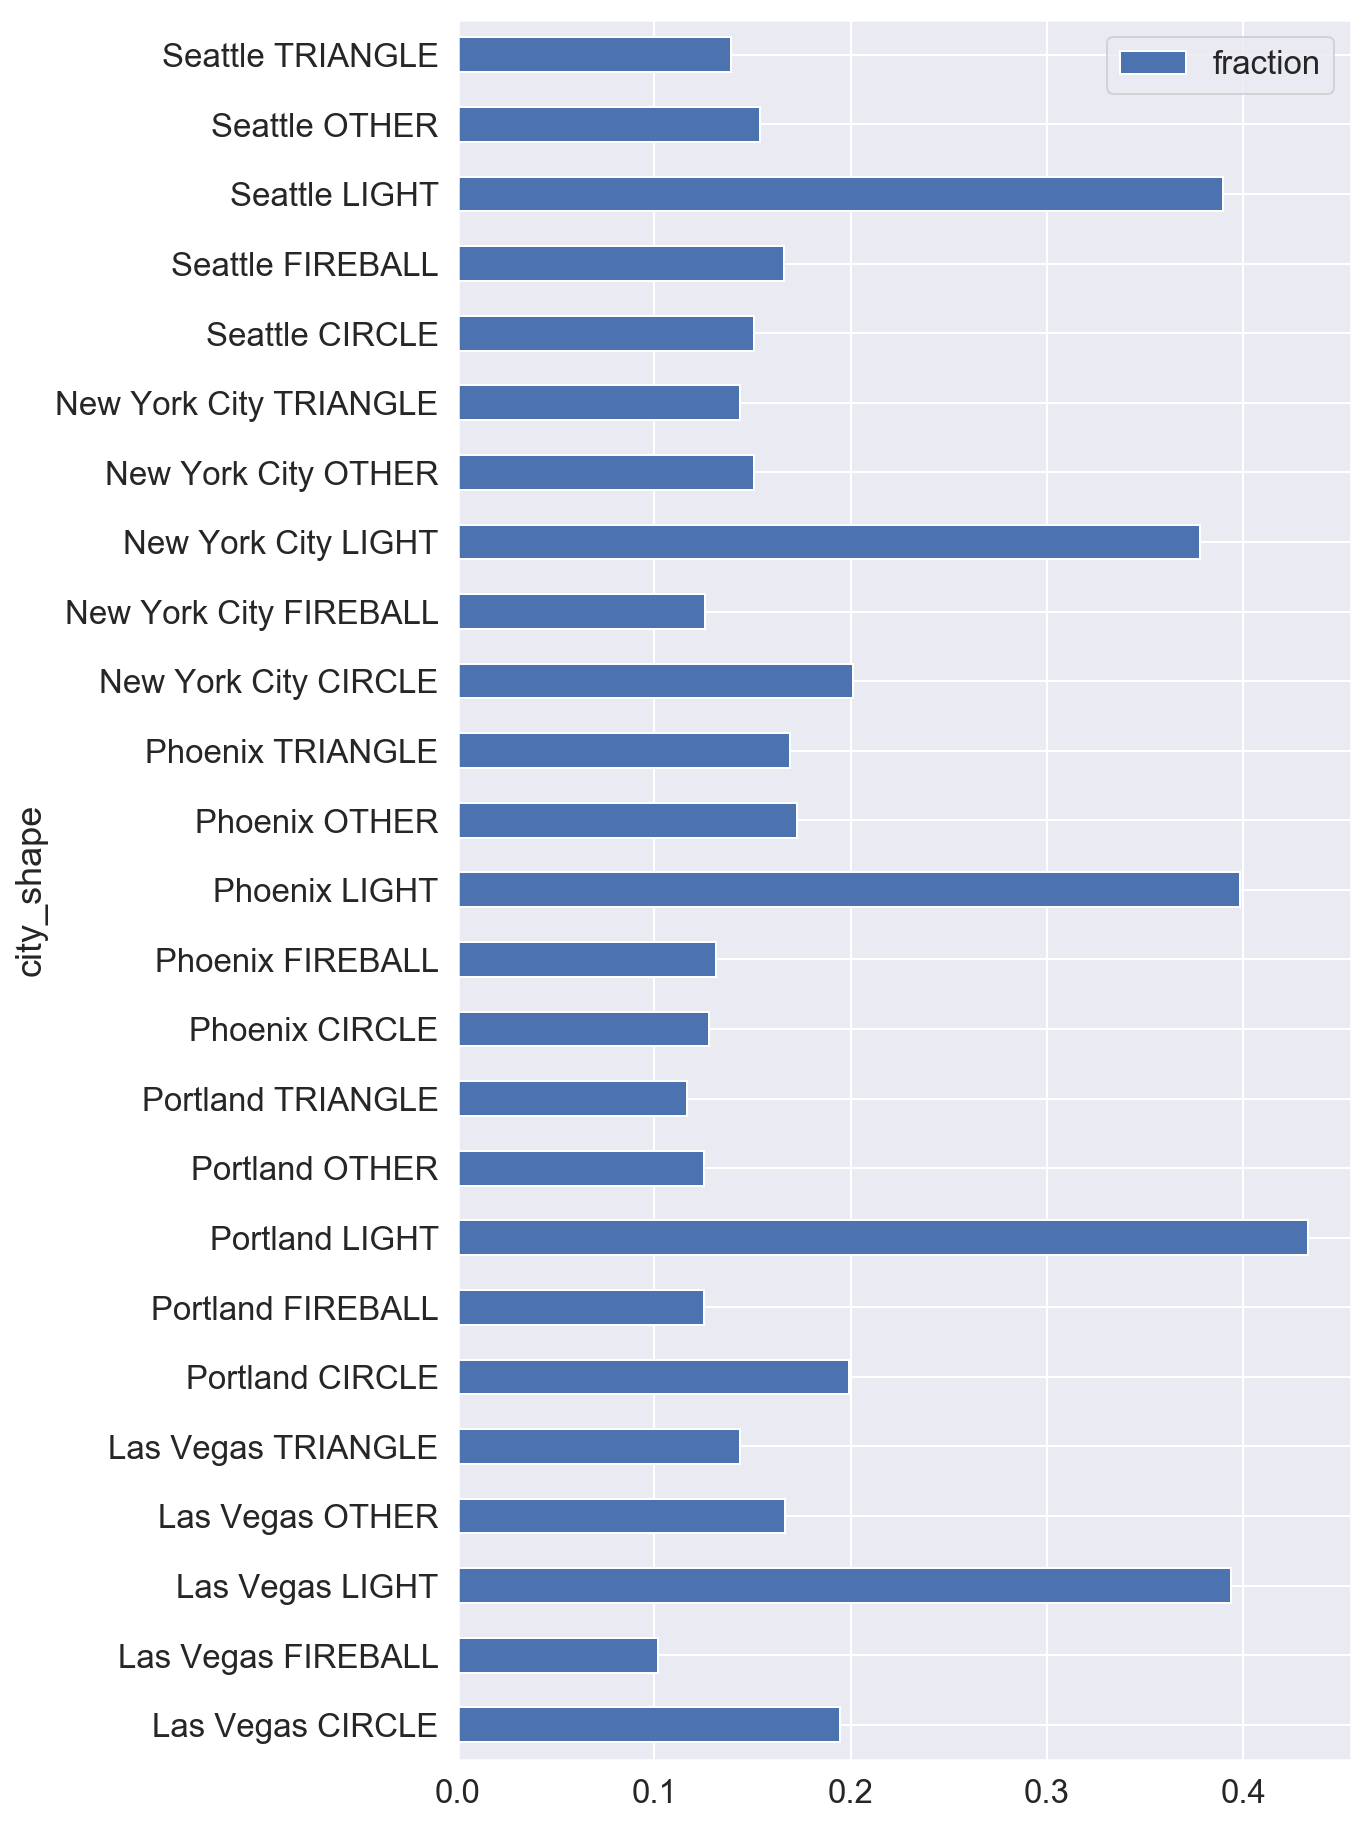

In [19]:
# Plot the horizontal bar chart
df_merged[['city_shape', 'fraction']].plot(kind='barh', y='fraction', x='city_shape', figsize=(8, 16));

#### Challenge: Obtain the fractions of shapes per city using groupby.

If you would like to do this with groupby, you need to do consecutive groupbys. Once you have grouped by city, you can aggregate grouping by shape and each subgroup size by the sum of the observations across all shape groups.

In [20]:
subset.groupby('City').apply(lambda x: x.groupby('Shape Reported').size())

Shape Reported,CIRCLE,FIREBALL,LIGHT,OTHER,TRIANGLE
City,,,,,
Las Vegas,42,22,85,36,31
New York City,56,35,105,42,40
Phoenix,34,35,106,46,45
Portland,46,29,100,29,27
Seattle,50,55,129,51,46


In [21]:
subset.groupby('City').apply(lambda x: x.groupby('Shape Reported').size().sum())

City
Las Vegas        216
New York City    278
Phoenix          266
Portland         231
Seattle          331
dtype: int64

In [22]:
# you can divide first one / second one
# this will iterate through to calc fractions:

grouped_city_and_shape = subset.groupby('City').apply(lambda x: x.groupby('Shape Reported').size()
                                                                 /x.groupby('Shape Reported').size().sum())
grouped_city_and_shape

Shape Reported,CIRCLE,FIREBALL,LIGHT,OTHER,TRIANGLE
City,,,,,
Las Vegas,0.194444,0.101852,0.393519,0.166667,0.143519
New York City,0.201439,0.125899,0.377698,0.151079,0.143885
Phoenix,0.127820,0.131579,0.398496,0.172932,0.169173
Portland,0.199134,0.125541,0.432900,0.125541,0.116883
Seattle,0.151057,0.166163,0.389728,0.154079,0.138973


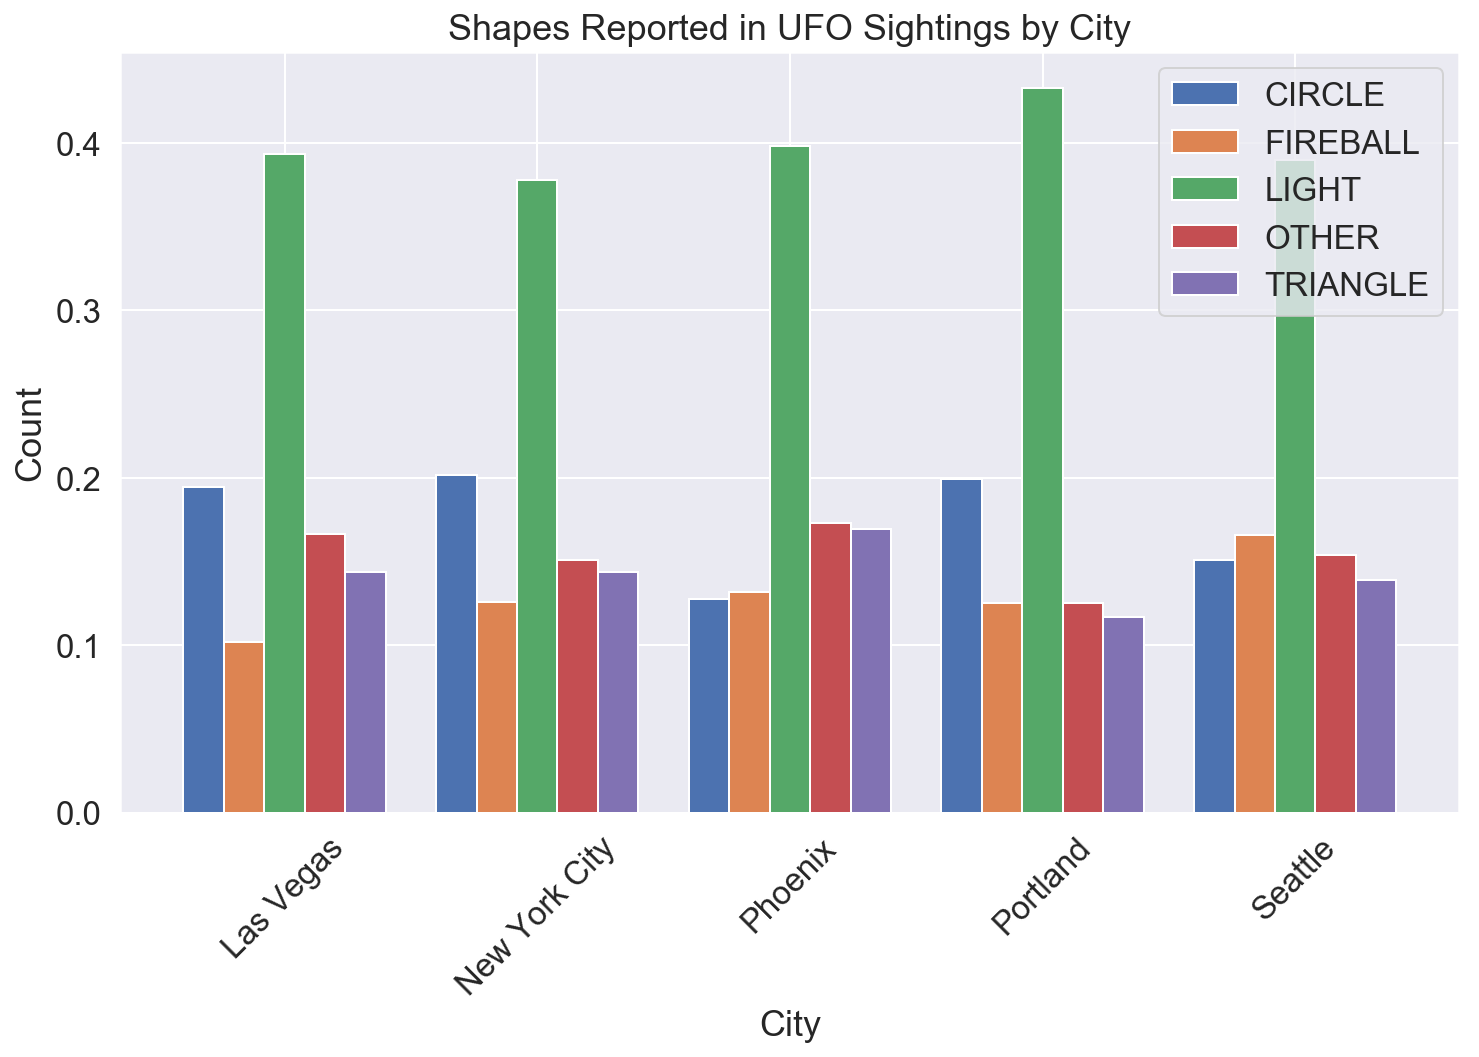

In [23]:
grouped_city_and_shape.plot(kind='bar', width=0.8, figsize=(12, 7))
plt.ylabel('Count')
plt.xlabel('City')
plt.title('Shapes Reported in UFO Sightings by City')
plt.xticks(rotation=45)
plt.legend()

plt.show()